# KAGGLE PROJECT: Malicious and Benign Websites
## Preprossessing and Feature Selection

***

#### Mireia Fernández Fernández (NIU 1562636)

Here we will take the first look into the dataset given and see what interesting characteristics we can find, as well as get a grasp about all the attributes for a better understanding of the problem.

In [1]:
# different imports for all the libraries used
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# save the dataset into a pandas dataframe
dataset = pd.read_csv("dataset.csv")

In [3]:
# lets see how the five first rows look like
dataset.head() 

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.000,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.000,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.000,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.000,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.000,None,None,None,None,...,0,0,0,0,0,0,0,0,0.000,0
3,B0_113,17,6,ISO-8859-1,nginx,162.000,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.000,0
4,B0_403,17,6,UTF-8,None,124140.000,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.000,0


In [4]:
# a brief description to better understand the data
dataset.describe()

# here we see that first glance that content_length is missing a lot of rows (theyre most likely to appear as null)
#     and the means, as well as the stds have a huge range for those attributes that are not binary (eg. the type)
#     this indicates that the regressions and classifications may need to be done with the standarized ver of the data

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000,1781.000,969.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1781.000,1780.000,1781.000
mean,56.961,11.112,11726.928,16.261,5.473,3.061,2982.339,18.540,18.746,15892.546,3155.599,18.540,2.263,0.121
std,27.556,4.550,36391.809,40.501,21.807,3.387,56050.575,41.627,46.398,69861.930,56053.780,41.627,2.931,0.327
min,16.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,39.000,8.000,324.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,49.000,10.000,1853.000,7.000,0.000,2.000,672.000,8.000,9.000,579.000,735.000,8.000,0.000,0.000
75%,68.000,13.000,11323.000,22.000,5.000,5.000,2328.000,26.000,25.000,9806.000,2701.000,26.000,4.000,0.000
max,249.000,43.000,649263.000,1194.000,708.000,17.000,2362906.000,1198.000,1284.000,2060012.000,2362906.000,1198.000,20.000,1.000


In [5]:
# describes the type of data contained in each row
display(dataset.dtypes)

# here we see that there are some non numerical types of attributes, which we will have to take care of:
#     URL, CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE.

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
# lets see the 15 first rows to try to understand what happens in the content_length column
dataset.iloc[:15,:]

# here we see that some appear as nan (not a number) which kinda does not make sense cause it should the least be zero
#     so as a first approach i will fill them with 0 as if the website was empty (later we could see what happens when
#     we fill it with other stuff)

# we also see that there is a lot of None etiquettes, which could be worrying (or not!) so we should considere if some
#     of the attributes may not be important enough for the classifier since they mostly appear in the same four.
#     for instance, we see that whois_statepro only lists thee states of the USA /if the country/ is the USA, so i 
#     think that column is irrelevant enough

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.000,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.000,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.000,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.000,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.000,None,None,None,None,...,0,0,0,0,0,0,0,0,0.000,0
3,B0_113,17,6,ISO-8859-1,nginx,162.000,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.000,0
4,B0_403,17,6,UTF-8,None,124140.000,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.000,0
5,B0_2064,18,7,UTF-8,nginx,nan,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.000,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.000,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.000,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.000,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.000,0
8,M2_17,20,5,utf-8,nginx/1.10.1,nan,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.000,1
9,M3_75,20,5,utf-8,nginx/1.10.1,nan,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.000,1


In [7]:
# to see clearly what is missing
dataset.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [8]:
# to make sure we know the amount of Nones that there are in each column, we will use the sum function in a dictionary
none_dict = { 'URL' : sum(dataset.URL == 'None'), 'URL_LENGTH' : sum(dataset.URL_LENGTH == 'None'), 
              'NUMBER_SPECIAL_CHARACTERS' : sum(dataset.NUMBER_SPECIAL_CHARACTERS == 'None'), 
              'CHARSET' : sum(dataset.CHARSET == 'None'), 'SERVER' : sum(dataset.SERVER == 'None'),
              'CONTENT_LENGTH' : sum(dataset.CONTENT_LENGTH == 'None'), 
              'WHOIS_COUNTRY' : sum(dataset.WHOIS_COUNTRY == 'None'), 
              'WHOIS_STATEPRO' : sum(dataset.WHOIS_STATEPRO == 'None'), 
              'WHOIS_REGDATE' : sum(dataset.WHOIS_REGDATE == 'None'), 
              'WHOIS_UPDATED_DATE' : sum(dataset.WHOIS_UPDATED_DATE == 'None'), 
              'TCP_CONVERSATION_EXCHANGE' : sum(dataset.TCP_CONVERSATION_EXCHANGE == 'None'), 
              'DIST_REMOTE_TCP_PORT' : sum(dataset.DIST_REMOTE_TCP_PORT == 'None'), 
              'REMOTE_IPS' : sum(dataset.REMOTE_IPS == 'None'), 'APP_BYTES' : sum(dataset.APP_BYTES == 'None'), 
              'SOURCE_APP_PACKETS' : sum(dataset.SOURCE_APP_PACKETS == 'None'), 
              'REMOTE_APP_PACKETS' : sum(dataset.REMOTE_APP_PACKETS == 'None'), 
              'SOURCE_APP_BYTES' : sum(dataset.SOURCE_APP_BYTES == 'None'), 
              'REMOTE_APP_BYTES' : sum(dataset.REMOTE_APP_BYTES == 'None'), 
              'APP_PACKETS' : sum(dataset.APP_PACKETS == 'None'), 
              'DNS_QUERY_TIMES' : sum(dataset.DNS_QUERY_TIMES == 'None'), 'Type' : sum(dataset.Type == 'None')}

none_dict

{'URL': 0,
 'URL_LENGTH': 0,
 'NUMBER_SPECIAL_CHARACTERS': 0,
 'CHARSET': 7,
 'SERVER': 175,
 'CONTENT_LENGTH': 0,
 'WHOIS_COUNTRY': 306,
 'WHOIS_STATEPRO': 362,
 'WHOIS_REGDATE': 127,
 'WHOIS_UPDATED_DATE': 139,
 'TCP_CONVERSATION_EXCHANGE': 0,
 'DIST_REMOTE_TCP_PORT': 0,
 'REMOTE_IPS': 0,
 'APP_BYTES': 0,
 'SOURCE_APP_PACKETS': 0,
 'REMOTE_APP_PACKETS': 0,
 'SOURCE_APP_BYTES': 0,
 'REMOTE_APP_BYTES': 0,
 'APP_PACKETS': 0,
 'DNS_QUERY_TIMES': 0,
 'Type': 0}

In [9]:
# fill the nan values with 0s
dataset["CONTENT_LENGTH"] = dataset["CONTENT_LENGTH"].fillna(0)
dataset["DNS_QUERY_TIMES"] = dataset["DNS_QUERY_TIMES"].fillna(0)

# eliminate columns:
#     url because it is just an anonimous eitquette that contains the type and will conditionate our model to something that is not real
#     whois_statepro because it is redundant given the country, 
dataset.drop(["URL", "WHOIS_STATEPRO"], axis=1, inplace=True) 

# eliminate rows where one value is not worth trying to fullfill or the entries give read problems (char variables)
#     since it has been observed that the values with WHOIS_REGDATE = something like '2002-03-20T23:59:59.0Z' do not have info
dataset.drop([104, 290, 357, 383, 1067, 1306, 1394, 1400], inplace=True)

In [10]:
# to unify the country labels so that only one label refers to only one country:
#     first here we can see all the labels, so we know which to change
print(set(dataset['WHOIS_COUNTRY'].tolist()))

# this is an example to how we search for the rows with a certain etiquette, and if we see that there are more than two entries then we wil use the 
#     indices as a list to iterate and change the values (non manually)
#     dataset[dataset["WHOIS_COUNTRY"] == "[u'GB'; u'UK']"]

# and now we update the labels so that it is consistent trough the dataset (the None is left as an undefined country)
dataset.at[1001,'WHOIS_COUNTRY'] = 'UK'
dataset.at[1353,'WHOIS_COUNTRY'] = 'CY'
dataset.at[1411,'WHOIS_COUNTRY'] = 'CY'
dataset.at[30,'WHOIS_COUNTRY'] = 'SE'

for i in dataset.index[dataset['WHOIS_COUNTRY'] == 'GB'].tolist():
    dataset.at[i,'WHOIS_COUNTRY'] = 'UK'
    
for i in dataset.index[dataset['WHOIS_COUNTRY'] == 'ru'].tolist():
    dataset.at[i,'WHOIS_COUNTRY'] = 'RU'
    
for i in dataset.index[dataset['WHOIS_COUNTRY'] == "[u'GB'; u'UK']"].tolist():
    dataset.at[i,'WHOIS_COUNTRY'] = 'UK'

{'TR', 'CH', 'Cyprus', 'SI', 'UG', 'UK', 'DE', 'AU', 'BR', 'LV', 'United Kingdom', 'NL', 'HK', 'SE', 'ru', 'UA', 'us', 'ES', 'IT', 'IN', 'PK', 'LU', 'CA', 'PA', 'GB', 'AT', 'KG', 'CZ', 'PH', 'BS', 'BY', 'UY', 'BE', 'se', 'IL', 'TH', 'FR', 'KY', 'NO', 'AE', 'None', 'KR', 'RU', 'SC', 'JP', 'IE', 'US', 'CN'}


In [11]:
# first we update some values so there are no errors in the following functions
dataset.at[1360,'WHOIS_REGDATE'] = 'None'

# here we will separate the information in the columns whois_regdate and whois_update_date so we can use its information, declaring first a 
#     lambda function that will help in the computation of the time of the day given a HH:MM string, and then another function that will 
#     automatize the process for both columns

f_hour_day = lambda a, b: a + b/60 

def separate_attr(dataset, column, pos_year, pos_date, new_col_year, new_col_date):
    year = []
    hour = []
    for i in dataset[column]:
        if (i != 'None'):
            dyh = i.split(" ") 
            year.append(dyh[0].split("/")[2])
            hour.append(f_hour_day(*[int(j) for j in dyh[1].split(":")]))
        else:
            year.append(0)
            hour.append(0)

    dataset.insert(pos_year, new_col_year, year, True)
    dataset.insert(pos_date, new_col_date, hour, True)
    dataset.drop([column], axis=1, inplace=True)

separate_attr(dataset, "WHOIS_REGDATE", 6, 7, "WHOIS_REGD_YEAR", "WHOIS_REGD_HOUR")
separate_attr(dataset, "WHOIS_UPDATED_DATE", 8, 9, "WHOIS_REGUP_YEAR", "WHOIS_REGUP_HOUR")

In [12]:
# the next step is to process all the categorical data. in this case we will make use of the get_dummies() function from the 
#     pandas library, which applies a OneHotEncoder method. later on, LabelEncoder will also be used to compare (from sklearn) 

"""
le_c = preprocessing.LabelEncoder()
dataset["CHARSET_CAT"] = le_c.fit_transform(dataset["CHARSET"])

le_s = preprocessing.LabelEncoder()
dataset["SERVER_CAT"] = le_s.fit_transform(dataset["SERVER"])

le_p = preprocessing.LabelEncoder()
dataset['WHOIS_COUNTRY_CAT'] = le_p.fit_transform(dataset['WHOIS_COUNTRY'])

dataset.drop(["CHARSET"], axis=1, inplace=True)
dataset.drop(["SERVER"], axis=1, inplace=True)
dataset.drop(["WHOIS_COUNTRY"], axis=1, inplace=True)
"""

dataset = pd.get_dummies(dataset, columns=["CHARSET","SERVER","WHOIS_COUNTRY"])  

In [13]:
# it is clear that now the dataset contains is high dimensional, as it can be seen in the number of columns it has
dataset.shape

# in order to reduce the number of attributes of the data, the execution time of the methods that we will apply and
#     be able to visualize for a better understanding, we will perform a PCA analysis.

(1773, 310)

In [14]:
# the first step will be to separate the attribute matrix and the target, since the PCA is an unsupervised method
y = dataset["Type"]
dataset.drop(["Type"], axis=1, inplace=True)
X = dataset

# now we center and scale the data
sX = preprocessing.scale(X)

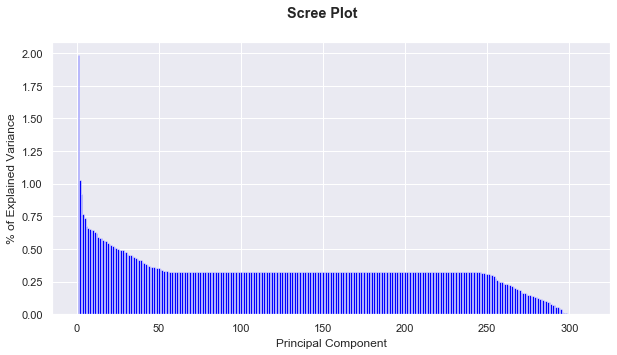

In [15]:
# we create a PCA object and calculate all the information needed to find the best dimensionality reduction
pca = PCA()
pca.fit(sX)
pca_data = pca.transform(sX)

per_var = pca.explained_variance_ratio_*100 #np.round(pca.explained_variance_ratio_*100, decimals=1)

plt.figure(figsize=(10,5))
#sns.stripplot(x=xs, y=per_var)
plt.bar(x=range(1, len(per_var)+1), height=per_var, width=1, color="blue", linewidth=0.5) #, tick_label=labels
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Component')
plt.suptitle("Scree Plot",
             fontsize = 'x-large', fontweight = 'bold' )
plt.show()

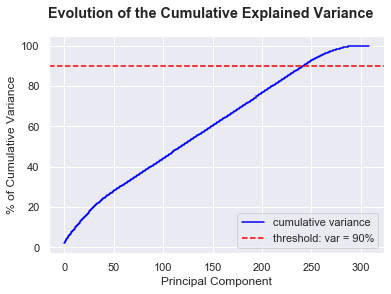

With 242 components, cumulative variance reached is 90.1340753541689


In [16]:
# when do we arrive at the 90% of the explained variance?
cum_sum = np.cumsum(per_var)

plt.step(range(0,len(cum_sum)), cum_sum, where='mid', color="blue",label='cumulative variance')
plt.axhline(y=90, color='red', linestyle='--',label='threshold: var = 90%')
plt.ylabel("% of Cumulative Variance")
plt.xlabel('Principal Component')
plt.suptitle("Evolution of the Cumulative Explained Variance",
             fontsize = 'x-large', fontweight = 'bold' )
plt.legend() 
plt.show()

# imposing that the explained variance of the data must reach the 90%, we obtain a dimensional reduction to 242, 
#     which results in 67 less attributes to take into consideration
print("With 242 components, cumulative variance reached is", cum_sum[242])

In [17]:
# finally, we create a new dataset using the 242 PC calculated, instead of the 309 attributes that we had initially,
#     add the target at its end and show the firsts rows to secure that the new dataset looks as it should
labels = ['PC'+str(i) for i in range(1, 243)]
final_dataset = pd.DataFrame(pca_data[:,:242], columns=labels)
final_dataset.insert(242, "Type", y, True)
final_dataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC234,PC235,PC236,PC237,PC238,PC239,PC240,PC241,PC242,Type
0,-0.367,3.869,-1.690,1.971,-1.977,0.724,1.066,-0.994,0.101,0.803,...,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,1.000
1,0.200,7.465,-0.429,1.383,-0.799,0.670,-0.733,-0.129,0.037,0.476,...,1.304,-7.073,7.261,21.787,-1.186,-6.127,-0.250,1.109,0.869,0.000
2,-0.863,5.145,-2.068,1.558,1.047,-4.161,-0.098,0.786,-0.038,0.067,...,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.365,-0.058,-2.035,-0.454,-0.514,0.992,0.161,0.144,0.019,-0.050,...,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000
4,2.440,-0.486,-0.804,-1.491,-0.802,0.442,-0.331,-0.187,-0.062,-0.104,...,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000
